In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

random_state = 42
np.random.seed(random_state)
%matplotlib inline

filename = './ml_python_labexam_2023_02_03.csv'
separator = ','

# 1

In [2]:
df = pd.read_csv(filename, sep=separator)
# we now explore the first few rows of the dataset
df.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948


In [3]:
print(f'Dataset with {df.shape[0]} rows and {df.shape[1]} columns')
target = 'y'
df.describe()

Dataset with 1000 rows and 11 columns


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


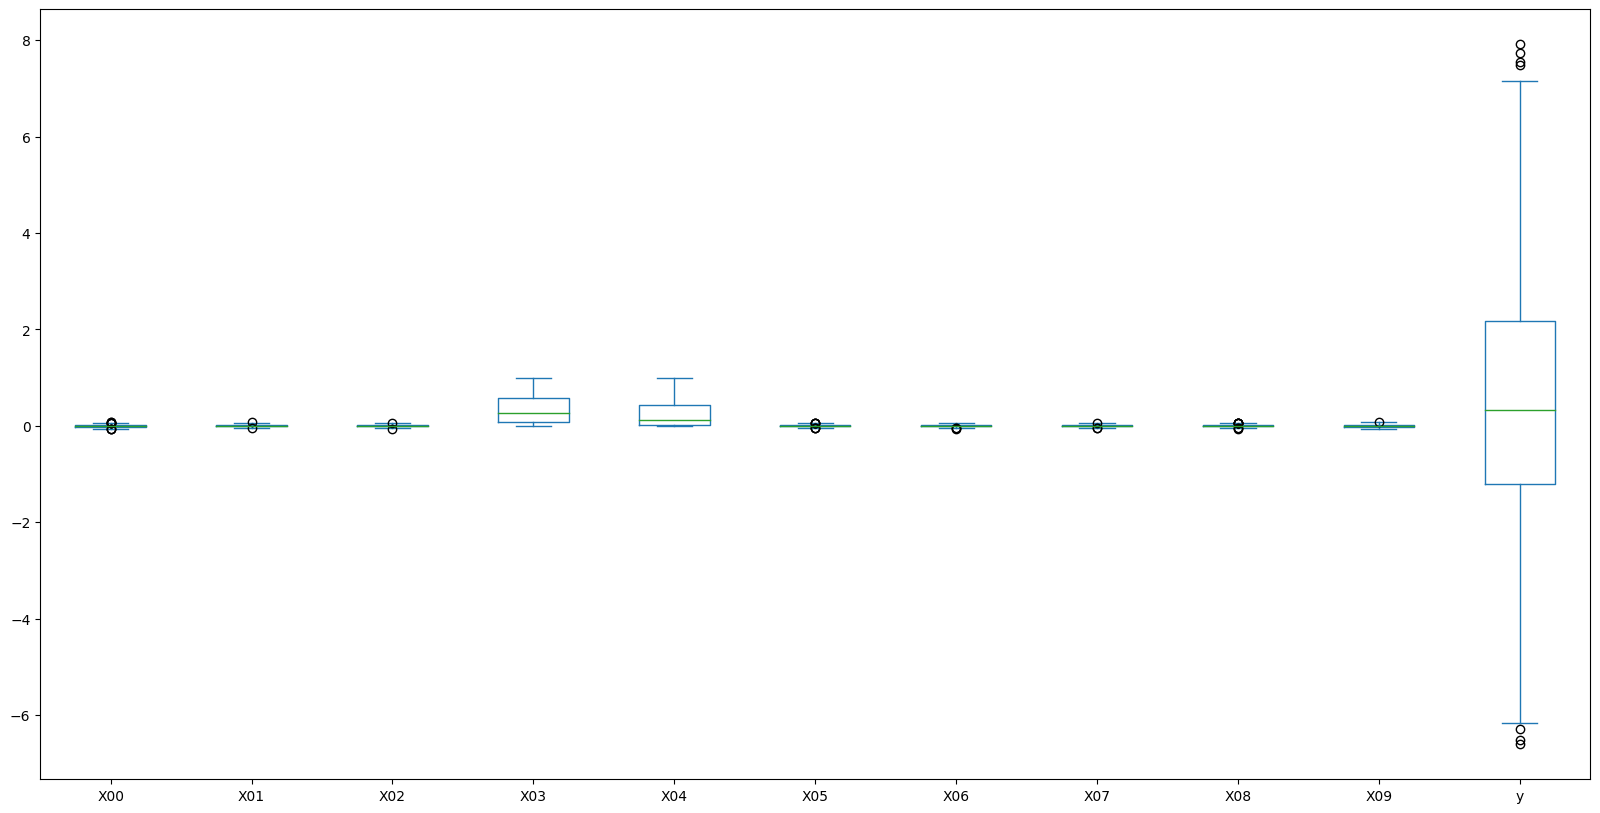

In [4]:
df.plot.box(figsize=(20, 10));

In [5]:
df.corr()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
X00,1.000000,0.170854,-0.395194,-0.043222,-0.023247,-0.275844,0.280314,0.243400,-0.325324,-0.153477,0.227594
X01,0.170854,1.000000,-0.308342,0.015840,-0.059226,0.102338,0.047167,0.086368,0.009363,-0.268953,0.170725
X02,-0.395194,-0.308342,1.000000,0.028499,0.036766,-0.266042,-0.326706,0.043103,0.195065,0.112824,-0.287004
X03,-0.043222,0.015840,0.028499,1.000000,-0.049209,0.008271,0.011157,-0.006028,0.029519,-0.006292,-0.005415
X04,-0.023247,-0.059226,0.036766,-0.049209,1.000000,-0.018662,-0.048011,-0.002504,-0.006653,0.042886,0.002213
X05,-0.275844,0.102338,-0.266042,0.008271,-0.018662,1.000000,0.119608,-0.292621,0.115454,0.021566,0.369986
X06,0.280314,0.047167,-0.326706,0.011157,-0.048011,0.119608,1.000000,-0.228867,0.054893,-0.274311,0.376340
X07,0.243400,0.086368,0.043103,-0.006028,-0.002504,-0.292621,-0.228867,1.000000,-0.145627,-0.132451,-0.056175
X08,-0.325324,0.009363,0.195065,0.029519,-0.006653,0.115454,0.054893,-0.145627,1.000000,-0.316079,0.209655
X09,-0.153477,-0.268953,0.112824,-0.006292,0.042886,0.021566,-0.274311,-0.132451,-0.316079,1.000000,0.374650


# 2

Once we have loaded our dataset we can use the output of the cells above in order to explore the data.\
We can see that our dataset is composed of 11 columns (one is the target) and 1000 rows.\
First of all we can use the function describe to get some basic statistics about the dataset.
From the output of the describe function we can see that the mean of the columns from X00 to X02 and from X05 to X09 are almost the same, so theese columns have almost the same distribution, while the columns X03 and X04 have a different distribution resulting more skewed.\
Also the target column has a different distribution from the other columns, as we can see from the mean and the standard deviation.\
Theese informations above can also be verified by looking at the boxplot. Here we can see that the columns X03 and X04 (and also the target column) have a different distribution from the other columns, while the columns X00 to X02 and from X05 to X09 have a similar distribution.\
We can now look at the correlation matrix between the columns. If we consider the correlation between the columns and the target (the last column/row of the correlation matrix), we can see that columns X03, X04 and X07 have a correlation in absolute value less than 0.15 so they are relly not correlated with the target.

# 3

In [6]:
# we now split the dataset into X, y and extract the training and test sets
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
print(f'Training set with {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Test set with {X_test.shape[0]} rows and {X_test.shape[1]} columns')

Training set with 800 rows and 10 columns
Test set with 200 rows and 10 columns


In [7]:
# we are now training a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
# we can compute RMSE from MSE using np.sqrt or using the squared parameter = False, as shown below
print(f'RMSE (on train set): {np.sqrt(mean_squared_error(y_train, y_pred_train))}')
print(f'RMSE (on test set): {np.sqrt(mean_squared_error(y_test, y_pred_test))}')

# alternative way to compute RMSE
# print(f'RMSE = {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE (on train set): 0.8731890168220966
RMSE (on test set): 0.8550066730486878


# 4

In [8]:
# theese are the columns with a correlation in absolute value less than 0.15
to_drop = ['X03', 'X04', 'X07']
df_red = df.drop(to_drop, axis=1)
# checking if we dropped the right columns
df_red.head()

,X00,X01,X02,X05,X06,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.023372,0.003706,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,-0.012447,0.029382,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,-0.004157,0.008240,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.027526,0.012792,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.018246,-0.000294,0.004178,0.014846,1.623948


In [9]:
# we split the new dataset reduced into X_red and y_red

X_red = df_red.drop(target, axis=1)
y_red = df_red[target]

# and generate the training and test sets with the dataset reduced
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=random_state)

In [10]:
lin_reg_red = LinearRegression()
lin_reg_red.fit(X_train_red, y_train_red)
y_pred_train_red = lin_reg_red.predict(X_train_red)
y_pred_test_red = lin_reg_red.predict(X_test_red)
print(f'RMSE (on reduced train set): {np.sqrt(mean_squared_error(y_train_red, y_pred_train_red))}')
print(f'RMSE (on reduced test set): {np.sqrt(mean_squared_error(y_test_red, y_pred_test_red))}')

RMSE (on reduced train set): 1.0082876893559303
RMSE (on reduced test set): 0.9624394299596234


# 5

In [11]:
dt_reg = DecisionTreeRegressor(random_state=random_state)
dt_reg.fit(X_train_red, y_train_red)
y_dt_train = dt_reg.predict(X_train_red)
y_dt_test = dt_reg.predict(X_test_red)

print(f'RMSE (on reduced train set): {np.sqrt(mean_squared_error(y_train_red, y_dt_train))}')
print(f'RMSE (on reduced test set): {np.sqrt(mean_squared_error(y_test_red, y_dt_test))}')

max_dept = dt_reg.get_depth()
print(f'Max depth of the tree: {max_dept}')

RMSE (on reduced train set): 0.0
RMSE (on reduced test set): 1.893770036036949
Max depth of the tree: 17


# 6

In [12]:
param_grid = {'max_depth': np.arange(1, max_dept+1)}

grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=random_state), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_dt.fit(X_train_red, y_train_red)
print(f'Best RMSE: {-grid_dt.best_score_}')
print(f'Best max_depth: {grid_dt.best_params_}')

Best RMSE: 2.0581721643048145
Best max_depth: {'max_depth': 5}


# 7

Once we have fitted the several models we can use the output of the cells above in order to compare the models.\
We can clearly see that the best model is the first multivariate linear regressor, trained on the full dataset without dropping the low-correlated columns.\
This can be due to the fact that, depite the low correlation between the columns and the target, the dropped columns added together with the other columns can be helpful for the model in finding better patterns.\
By looking at the DecisionTreeRegressor results we can state that this model is worse than the LinearRegression both using the standard hyperparamter and the best hyperparameter found by the GridSearchCV.\
This can be due to the fact that the DecisionTreeRegressor aims to find the best features on which applying a split, without taking into account the conjunction of different features in order to find more interesting patterns.\
Also the optimization of the max_depth using cross-validation did not provided a reduction of the error. 